In [66]:
import pandas as pd
df=pd.read_csv("car_website_data/Model_Combined_Data.csv")
df = df.drop('Unnamed: 0', axis=1)
df=df.dropna()
# Clean the data
df.drop_duplicates(inplace=True)
df

,Model,Comment
0,Tesla Model Y,As a new owner of a Model Y Performance (2022)...
1,Tesla Model Y,I purchased a new 2021 model Y and I’ve put ov...
2,Tesla Model Y,One of the best cars I owned. With recent pric...
3,Tesla Model Y,"Bought a Model X plaid. Delivery day came, dro..."
4,Tesla Model Y,We have driven the car for close to 5000 miles...
...,...,...
103991,Toyota bZ4X,Called around to 5 different dealers today. Ha...
103992,Toyota bZ4X,"$3,000 ? Not Cybertruck or Rivian is that much."
103993,Toyota bZ4X,I sat in the EV at the car show. Meh . I liked...
103994,Toyota bZ4X,Yeah. I don't order stuff unless I know stuff ...


In [67]:
# drop all rows with float values in the 'Reviews' column
df = df[pd.to_numeric(df['Comment'], errors='coerce').isna()]
# filter the dataframe to keep only sentences with more than 10 words
df_10 = df[df['Comment'].apply(lambda x: len(x.split()) > 10)]
df_10

,Model,Comment
0,Tesla Model Y,As a new owner of a Model Y Performance (2022)...
1,Tesla Model Y,I purchased a new 2021 model Y and I’ve put ov...
2,Tesla Model Y,One of the best cars I owned. With recent pric...
3,Tesla Model Y,"Bought a Model X plaid. Delivery day came, dro..."
4,Tesla Model Y,We have driven the car for close to 5000 miles...
...,...,...
103988,Toyota bZ4X,"Yeah, I’m sure most dealers started at 10-15 a..."
103990,Toyota bZ4X,My dealer is taking a refundable deposit of $5...
103991,Toyota bZ4X,Called around to 5 different dealers today. Ha...
103993,Toyota bZ4X,I sat in the EV at the car show. Meh . I liked...


In [68]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Define a function to clean comments
def clean_comment(comment):
    # Remove '\n' characters
    comment = comment.replace('\n', ' ')
    # Convert everything to lowercase
    comment = comment.lower()
    # Remove punctuation
    comment = comment.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the comment into words
    words = word_tokenize(comment)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join the words back into a string
    cleaned_comment = ' '.join(words)
    return cleaned_comment
df_10['cleaned_comment'] = df_10['Comment'].apply(clean_comment)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/zihanfang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/var/folders/b9/xvth5z3d0g725rzpttbd7rc80000gn/T/ipykernel_30253/371033263.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10['cleaned_comment'] = df_10['Comment'].apply(clean_comment)


In [69]:
df_10=df_10.dropna()
df_10

,Model,Comment,cleaned_comment
0,Tesla Model Y,As a new owner of a Model Y Performance (2022)...,new owner model performance 2022 say never dri...
1,Tesla Model Y,I purchased a new 2021 model Y and I’ve put ov...,purchased new 2021 model ’ put 4000 mile littl...
2,Tesla Model Y,One of the best cars I owned. With recent pric...,one best car owned recent price reduction tesl...
3,Tesla Model Y,"Bought a Model X plaid. Delivery day came, dro...",bought model x plaid delivery day came drove a...
4,Tesla Model Y,We have driven the car for close to 5000 miles...,driven car close 5000 mile 3 12 month good ev ...
...,...,...,...
103988,Toyota bZ4X,"Yeah, I’m sure most dealers started at 10-15 a...",yeah ’ sure dealer started 1015 slowly droppin...
103990,Toyota bZ4X,My dealer is taking a refundable deposit of $5...,dealer taking refundable deposit 500 response ...
103991,Toyota bZ4X,Called around to 5 different dealers today. Ha...,called around 5 different dealer today half ne...
103993,Toyota bZ4X,I sat in the EV at the car show. Meh . I liked...,sat ev car show meh liked concept sub reddit s...


In [70]:
##Data cleaning based on first round LDA result
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Remove any rows with missing values
df_10.dropna(subset=['cleaned_comment'], inplace=True)
# Convert the comments into a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_10['cleaned_comment'])

# Fit an LDA model to the data
lda = LatentDirichletAllocation(n_components=10, random_state=42)
X_topics = lda.fit_transform(X)
# Print the top 10 words for each topic
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    top_words_idx = topic.argsort()[::-1][:10] # get the indices of the top 10 words for the topic
    top_words = [feature_names[i] for i in top_words_idx]
    print(top_words)
    print()

Topic 0:
['mile', 'range', 'car', 'drive', 'battery', 'driving', 'time', 'trip', 'charge', 'day']

Topic 1:
['dealer', 'car', 'order', 'dealership', 'week', 'update', 'issue', 'got', 'new', 'im']

Topic 2:
['look', 'like', 'car', 'wheel', 'black', 'door', 'color', 'think', 'interior', 'screen']

Topic 3:
['charging', 'charger', 'charge', 'car', 'use', 'time', 'button', 'work', 'app', 'need']

Topic 4:
['model', 'price', 'tesla', 'tax', 'credit', 'year', 'id4', 'awd', 'car', '2023']

Topic 5:
['tire', 'car', 'mustang', 'gt', 'wheel', 'ford', 'stock', 'like', 'new', 'mach']

Topic 6:
['car', 'rear', 'camera', 'pro', 'window', 'time', 'parking', 'like', 'wiper', 'sensor']

Topic 7:
['thanks', 'video', 'review', 'ev', 'great', 'im', 'dont', 'like', 'good', 'na']

Topic 8:
['car', 'like', 'look', 'tesla', 'toyota', 'love', 'ev', 'new', 'electric', 'hyundai']

Topic 9:
['car', 'like', 'battery', 'mode', 'feel', 'make', 'ev', 'thing', 'think', 'really']



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [72]:
# define the keywords for each topic as a list
topic_keywords = [
    ['mile', 'range', 'car', 'drive', 'battery', 'driving', 'time', 'trip', 'charge', 'day'],
    ['dealer', 'car', 'order', 'dealership', 'week', 'update', 'issue', 'got', 'new', 'im'],
    ['look', 'like', 'car', 'wheel', 'black', 'door', 'color', 'think', 'interior', 'screen'],
    ['charging', 'charger', 'charge', 'car', 'use', 'time', 'button', 'work', 'app', 'need'],
    ['model', 'price', 'tax', 'credit', 'year', 'awd', 'car', '2023'],
    ['tire', 'car', 'gt', 'wheel', 'ford', 'stock', 'like', 'new', 'mach'],
    ['car', 'rear', 'camera', 'pro', 'window', 'time', 'parking', 'like', 'wiper', 'sensor'],
    ['thanks', 'video', 'review', 'ev', 'great', 'im', 'dont', 'like', 'good', 'na'],
    ['car', 'like', 'look', 'love', 'ev', 'new', 'electric'],
    ['car', 'like', 'battery', 'mode', 'feel', 'make', 'ev', 'thing', 'think', 'really']
]

# loop over each topic and create a new dataframe containing only rows with key words in the topic
for i, keywords in enumerate(topic_keywords):
    topic_df = df_10[df_10['cleaned_comment'].str.contains('|'.join(keywords))]


In [73]:
#second round LDA
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Convert the comments into a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_10['cleaned_comment'])

# Fit an LDA model to the data
lda = LatentDirichletAllocation(n_components=10, random_state=42)
X_topics = lda.fit_transform(X)
# Print the top 10 words for each topic
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    top_words_idx = topic.argsort()[::-1][:10] # get the indices of the top 10 words for the topic
    top_words = [feature_names[i] for i in top_words_idx]
    print(top_words)
    print()
# Create a dataframe with the topic labels for each comment
topic_labels = [f"Topic {topic_idx}" for topic_idx in X_topics.argmax(axis=1)]
topics_df = pd.DataFrame({'Topic': topic_labels})


Topic 0:
['mile', 'range', 'car', 'drive', 'battery', 'driving', 'time', 'trip', 'charge', 'day']

Topic 1:
['dealer', 'car', 'order', 'dealership', 'week', 'update', 'issue', 'got', 'new', 'im']

Topic 2:
['look', 'like', 'car', 'wheel', 'black', 'door', 'color', 'think', 'interior', 'screen']

Topic 3:
['charging', 'charger', 'charge', 'car', 'use', 'time', 'button', 'work', 'app', 'need']

Topic 4:
['model', 'price', 'tesla', 'tax', 'credit', 'year', 'id4', 'awd', 'car', '2023']

Topic 5:
['tire', 'car', 'mustang', 'gt', 'wheel', 'ford', 'stock', 'like', 'new', 'mach']

Topic 6:
['car', 'rear', 'camera', 'pro', 'window', 'time', 'parking', 'like', 'wiper', 'sensor']

Topic 7:
['thanks', 'video', 'review', 'ev', 'great', 'im', 'dont', 'like', 'good', 'na']

Topic 8:
['car', 'like', 'look', 'tesla', 'toyota', 'love', 'ev', 'new', 'electric', 'hyundai']

Topic 9:
['car', 'like', 'battery', 'mode', 'feel', 'make', 'ev', 'thing', 'think', 'really']



In [80]:
# Concatenate the original dataframe and the topics dataframe along the column axis
df_10 = df_10.reset_index(drop=True)
topics_df = topics_df.reset_index(drop=True)
topic_df_with_topics= pd.concat([df_10, topics_df], axis=1)
topic_df_with_topics

,Model,Comment,cleaned_comment,Topic
0,Tesla Model Y,As a new owner of a Model Y Performance (2022)...,new owner model performance 2022 say never dri...,Topic 9
1,Tesla Model Y,I purchased a new 2021 model Y and I’ve put ov...,purchased new 2021 model ’ put 4000 mile littl...,Topic 0
2,Tesla Model Y,One of the best cars I owned. With recent pric...,one best car owned recent price reduction tesl...,Topic 0
3,Tesla Model Y,"Bought a Model X plaid. Delivery day came, dro...",bought model x plaid delivery day came drove a...,Topic 1
4,Tesla Model Y,We have driven the car for close to 5000 miles...,driven car close 5000 mile 3 12 month good ev ...,Topic 9
...,...,...,...,...
73153,Toyota bZ4X,"Yeah, I’m sure most dealers started at 10-15 a...",yeah ’ sure dealer started 1015 slowly droppin...,Topic 1
73154,Toyota bZ4X,My dealer is taking a refundable deposit of $5...,dealer taking refundable deposit 500 response ...,Topic 1
73155,Toyota bZ4X,Called around to 5 different dealers today. Ha...,called around 5 different dealer today half ne...,Topic 1
73156,Toyota bZ4X,I sat in the EV at the car show. Meh . I liked...,sat ev car show meh liked concept sub reddit s...,Topic 8


In [81]:
topic_df_with_topics.to_csv("car_website_data/topic_df_with_topics_model.csv")



In [82]:
import pandas as pd
df=pd.read_csv("car_website_data/topic_df_with_topics_model.csv")
df = df.drop('Unnamed: 0', axis=1)
df=df.dropna()
# excluded_topics = ["Topic 1", "Topic 0", "Topic 3", "Topic 4", "Topic 9"]
# general_df = df.loc[~df['Topic'].isin(excluded_topics)]


In [83]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def get_sentiment(text):
    # Instantiate the sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    # Get the sentiment scores for the text
    scores = sid.polarity_scores(text)

    # Determine the sentiment label based on the score
    if scores['compound'] > 0:
        sentiment = 'positive'
    elif scores['compound'] < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    return sentiment
import pandas as pd

# Apply the sentiment analysis function to each row of text
df['Sentiment'] = df['cleaned_comment'].apply(get_sentiment)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [84]:
df.to_csv("topic_sentiment_model.csv")

In [85]:
# 'Appearance and features of EVs':
# Topic 2: ['look', 'like', 'car', 'wheel', 'black', 'door', 'color', 'think', 'interior', 'screen']
# Topic 5: ['tire', 'car', 'mustang', 'gt', 'wheel', 'ford', 'stock', 'like', 'new', 'mach']
# Topic 6: ['car', 'rear', 'camera', 'pro', 'window', 'time', 'parking', 'like', 'wiper', 'sensor']
# Topic 8: ['car', 'like', 'look', 'tesla', 'toyota', 'love', 'ev', 'new', 'electric', 'hyundai']


# 'Cost and price of EVs':
# Topic 4: ['model', 'price', 'tesla', 'tax', 'credit', 'year', 'id4', 'awd', 'car', '2023']


# 'Charging EVs':
# Topic 0: ['mile', 'range', 'car', 'drive', 'battery', 'driving', 'time', 'trip', 'charge', 'day']
# Topic 9: ['car', 'like', 'battery', 'mode', 'feel', 'make', 'ev', 'thing', 'think', 'really']

# 'Apps and chargers for EVs':
# Topic 3: ['charging', 'charger', 'charge', 'car', 'use', 'time', 'button', 'work', 'app', 'need']

# 'Market for EVs':

# Topic 1: ['dealer', 'car', 'order', 'dealership', 'week', 'update', 'issue', 'got', 'new', 'im']
# Topic 7: ['thanks', 'video', 'review', 'ev', 'great', 'im', 'dont', 'like', 'good', 'na']

# Define the mapping dictionary
topic_mapping = {
    "Topic 2": 'appearance and features of EVs',
    "Topic 5": 'appearance and features of EVs',
    "Topic 6": 'appearance and features of EVs',
    "Topic 8": 'appearance and features of EVs',
    
    "Topic 4": 'cost and price of EVs',
    "Topic 3": 'apps and chargers for EVs',
    
    "Topic 9": 'appearance and features of EVs',
    
    "Topic 0": 'charging EVs',
    "Topic 1": 'market for EVs',
    "Topic 7": 'market for EVs'
}
def map_topic(topic):
    return topic_mapping.get(topic, 'Unknown')
df['New_Topic'] = df['Topic'].apply(map_topic)


In [86]:
df

,Model,Comment,cleaned_comment,Topic,Sentiment,New_Topic
0,Tesla Model Y,As a new owner of a Model Y Performance (2022)...,new owner model performance 2022 say never dri...,Topic 9,positive,appearance and features of EVs
1,Tesla Model Y,I purchased a new 2021 model Y and I’ve put ov...,purchased new 2021 model ’ put 4000 mile littl...,Topic 0,neutral,charging EVs
2,Tesla Model Y,One of the best cars I owned. With recent pric...,one best car owned recent price reduction tesl...,Topic 0,positive,charging EVs
3,Tesla Model Y,"Bought a Model X plaid. Delivery day came, dro...",bought model x plaid delivery day came drove a...,Topic 1,positive,market for EVs
4,Tesla Model Y,We have driven the car for close to 5000 miles...,driven car close 5000 mile 3 12 month good ev ...,Topic 9,positive,appearance and features of EVs
...,...,...,...,...,...,...
73153,Toyota bZ4X,"Yeah, I’m sure most dealers started at 10-15 a...",yeah ’ sure dealer started 1015 slowly droppin...,Topic 1,positive,market for EVs
73154,Toyota bZ4X,My dealer is taking a refundable deposit of $5...,dealer taking refundable deposit 500 response ...,Topic 1,positive,market for EVs
73155,Toyota bZ4X,Called around to 5 different dealers today. Ha...,called around 5 different dealer today half ne...,Topic 1,negative,market for EVs
73156,Toyota bZ4X,I sat in the EV at the car show. Meh . I liked...,sat ev car show meh liked concept sub reddit s...,Topic 8,positive,appearance and features of EVs


## Visualize the frequency of each topic

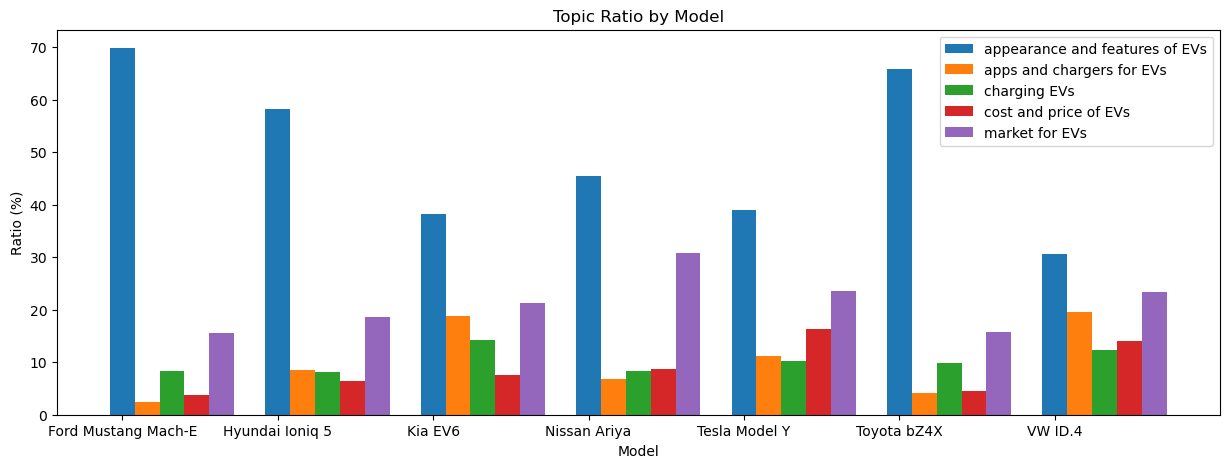

In [151]:
import matplotlib.pyplot as plt
import numpy as np
plt.subplots(figsize=(15, 5))

#Group the DataFrame by the model column
grouped = df.groupby('Model')

#Count the frequency of each topic within each group
topic_counts_by_model = grouped['New_Topic'].value_counts()

#Pivot the topic_counts_by_model DataFrame to create a matrix
topic_counts_matrix = topic_counts_by_model.unstack()

topics = topic_counts_matrix.columns.tolist()

models = topic_counts_matrix.index.tolist()


sentiment_ratios_matrix = topic_counts_matrix.div(topic_counts_matrix.sum(axis=1), axis=0) * 100


total_width = 0.8
num_bars = len(topics)
bar_width = total_width / num_bars

#Compute the center positions of the bars
center_positions = np.arange(len(models)) + 0.5 * (num_bars - 1) * bar_width
bar_positions = [center_positions + i * bar_width for i in range(num_bars)]

#Plot the bars for each topic
for i, topic in enumerate(topics):
    plt.bar(bar_positions[i], sentiment_ratios_matrix[topic], width=bar_width, label=topic)

#Set the axis labels and title
plt.xlabel('Model')
plt.ylabel('Ratio (%)')
plt.title('Topic Ratio by Model')

plt.xticks(center_positions, models)

plt.legend()

plt.show()

## Sentiment distribution by model

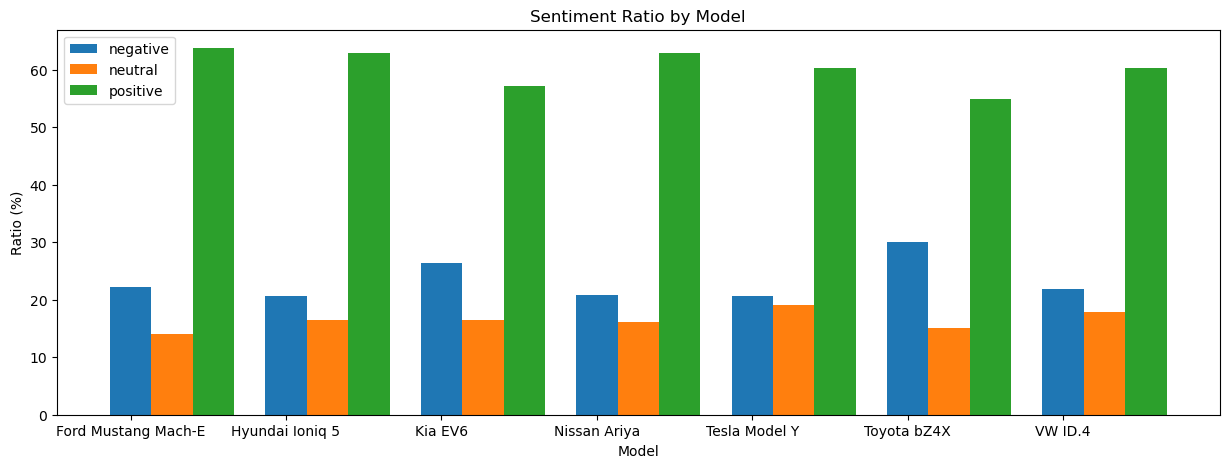

In [142]:
import matplotlib.pyplot as plt
import numpy as np
plt.subplots(figsize=(15, 5))

#Group the DataFrame by the model column
grouped = df.groupby('Model')

#Count the frequency of each topic within each group
topic_counts_by_model = grouped['Sentiment'].value_counts()

#Pivot the topic_counts_by_model DataFrame to create a matrix
topic_counts_matrix = topic_counts_by_model.unstack()

topics = topic_counts_matrix.columns.tolist()

models = topic_counts_matrix.index.tolist()


sentiment_ratios_matrix = topic_counts_matrix.div(topic_counts_matrix.sum(axis=1), axis=0) * 100


total_width = 0.8
num_bars = len(topics)
bar_width = total_width / num_bars

#Compute the center positions of the bars
center_positions = np.arange(len(models)) + 0.5 * (num_bars - 1) * bar_width
bar_positions = [center_positions + i * bar_width for i in range(num_bars)]

#Plot the bars for each topic
for i, topic in enumerate(topics):
    plt.bar(bar_positions[i], sentiment_ratios_matrix[topic], width=bar_width, label=topic)

#Set the axis labels and title
plt.xlabel('Model')
plt.ylabel('Ratio (%)')
plt.title('Sentiment Ratio by Model')

plt.xticks(center_positions, models)

plt.legend()

plt.show()


## Topic-sentiment co-occurrence:

## Word frequency analysis:

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


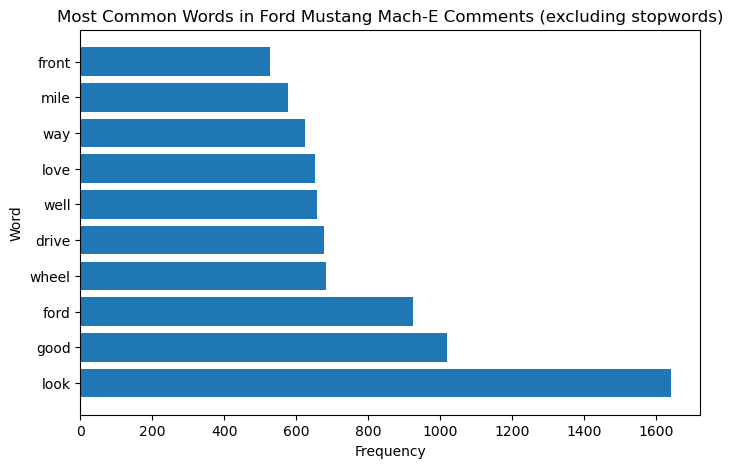

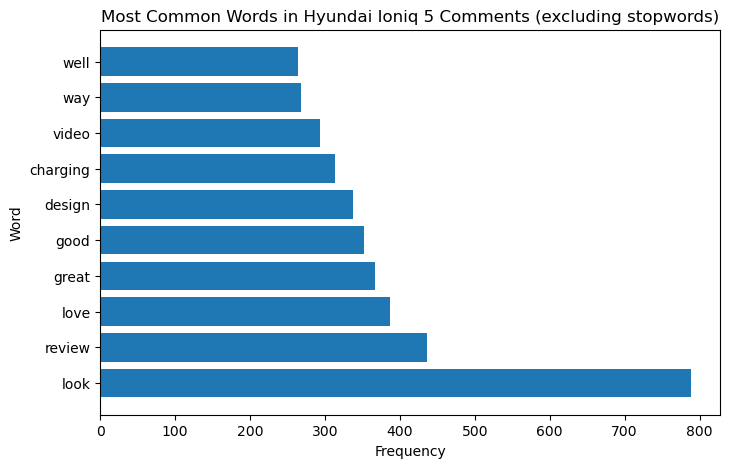

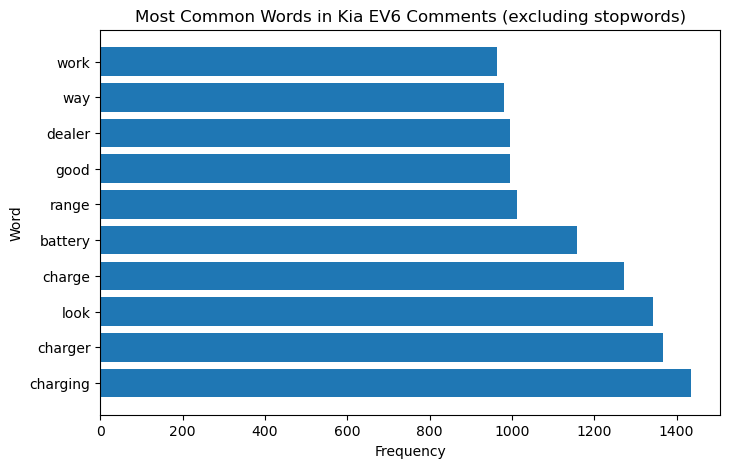

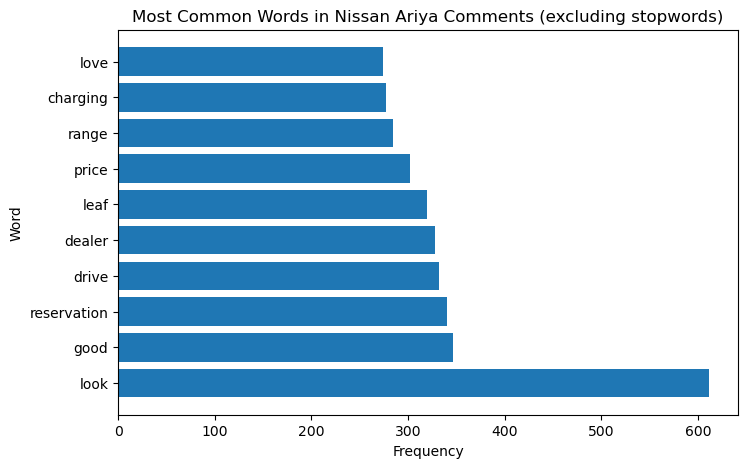

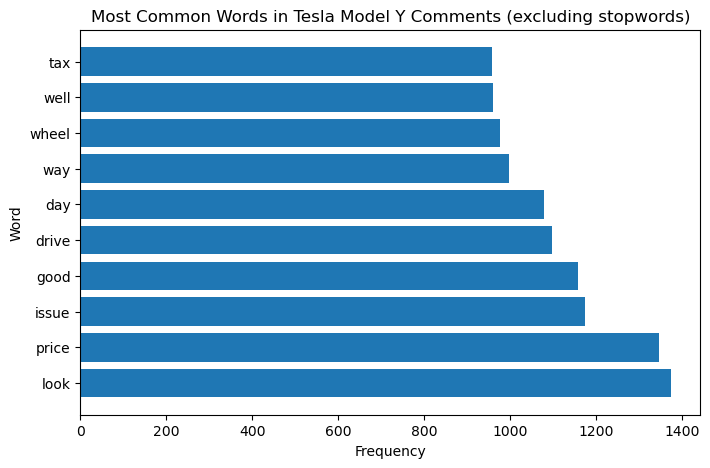

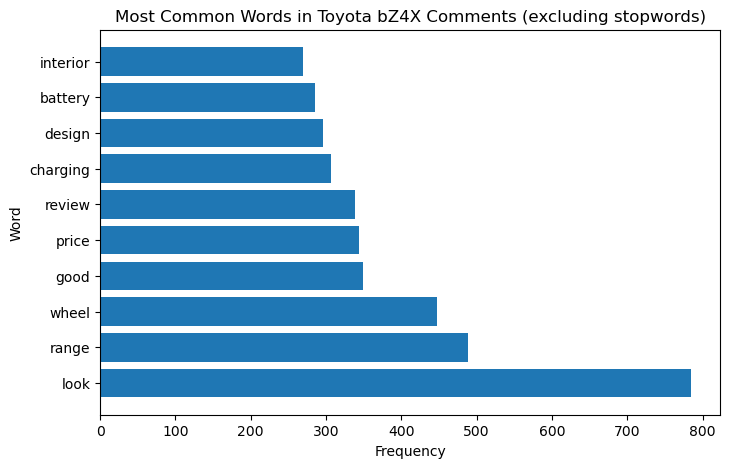

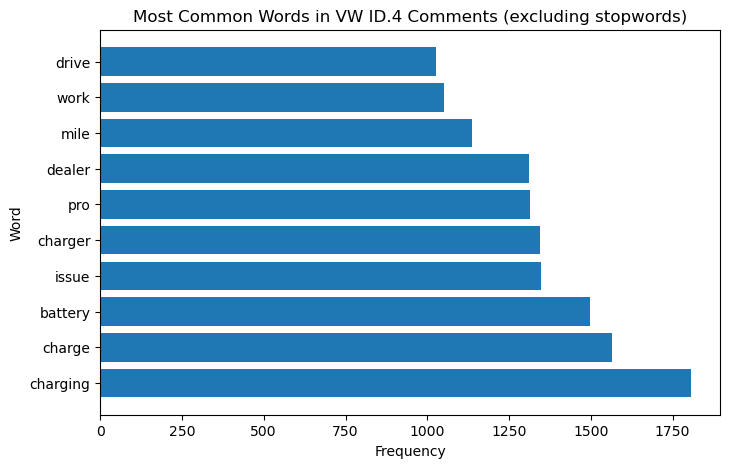

In [150]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Define your custom set of stopwords
my_stopwords = set(['would', 'one', 'mustang','get',"’","5","hyundai",'ev','tesla','nissan',
                   'ariya','car','also','electric','toyota','vw','id4',
             'vehicle', 'see', 'think', 'people', 'use', 'one','even','going',
               'used','model','that','got','thing','still',
                'thats','said','say','maybe','could','dont','actually','getting','im','though',
                'lot','u','many','didnt','much','know','back','want','since','without','like','time',
        'make','need','year','first','really','go','sure','seem','come','mine','better',
                'thank','gt','z','new','ioniq','kia','ev6','3','bz4x',])

# Tokenize the comments and remove the stopwords
tokens_by_model = df.groupby('Model')['cleaned_comment'].apply(lambda x: [token for token in word_tokenize(' '.join(x)) if token not in set(stopwords.words('english')) and token not in my_stopwords]).to_dict()

# Count the frequency of each word in each model's comments
word_counts_by_model = {model: Counter(tokens) for model, tokens in tokens_by_model.items()}

# Plot a horizontal bar chart of the most common words in each model's comments
for model, word_counts in word_counts_by_model.items():
    # Get the top 10 most common words
    top_words = dict(word_counts.most_common(10))
    
    # Plot a horizontal bar chart of the top words
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.barh(list(top_words.keys()), list(top_words.values()))
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Word')
    ax.set_title(f'Most Common Words in {model} Comments (excluding stopwords)')
    
    # Show the figure
    plt.show()



In [160]:
# Define a function to print the word frequency
def print_word_frequency(word_counts):
    # Sort the word counts in descending order
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Print the word frequency for each word
    for word, count in sorted_word_counts:
        print(f'{word}: {count}')
        
# Count the frequency of each word in each model's comments
word_counts_by_model = {model: Counter(tokens) for model, tokens in tokens_by_model.items()}

# Print the most common words in each model's comments
for model, word_counts in word_counts_by_model.items():
    # Get the top 10 most common words
    top_words = dict(word_counts.most_common(10))
    
    # Print the word frequency for the top words
    print(f'Most Common Words in {model} Comments (excluding stopwords):')
    print_word_frequency(top_words)
    print()


Most Common Words in Ford Mustang Mach-E Comments (excluding stopwords):
look: 1640
good: 1018
ford: 925
wheel: 683
drive: 677
well: 658
love: 652
way: 625
mile: 576
front: 528

Most Common Words in Hyundai Ioniq 5 Comments (excluding stopwords):
look: 788
review: 436
love: 387
great: 367
good: 352
design: 338
charging: 314
video: 293
way: 268
well: 264

Most Common Words in Kia EV6 Comments (excluding stopwords):
charging: 1434
charger: 1368
look: 1343
charge: 1272
battery: 1159
range: 1012
good: 995
dealer: 995
way: 981
work: 963

Most Common Words in Nissan Ariya Comments (excluding stopwords):
look: 611
good: 346
reservation: 340
drive: 332
dealer: 328
leaf: 320
price: 302
range: 284
charging: 277
love: 274

Most Common Words in Tesla Model Y Comments (excluding stopwords):
look: 1373
price: 1346
issue: 1174
good: 1158
drive: 1097
day: 1078
way: 998
wheel: 976
well: 960
tax: 958

Most Common Words in Toyota bZ4X Comments (excluding stopwords):
look: 784
range: 489
wheel: 447
good: 

## Visualize the frequency of each sentiment for each topic

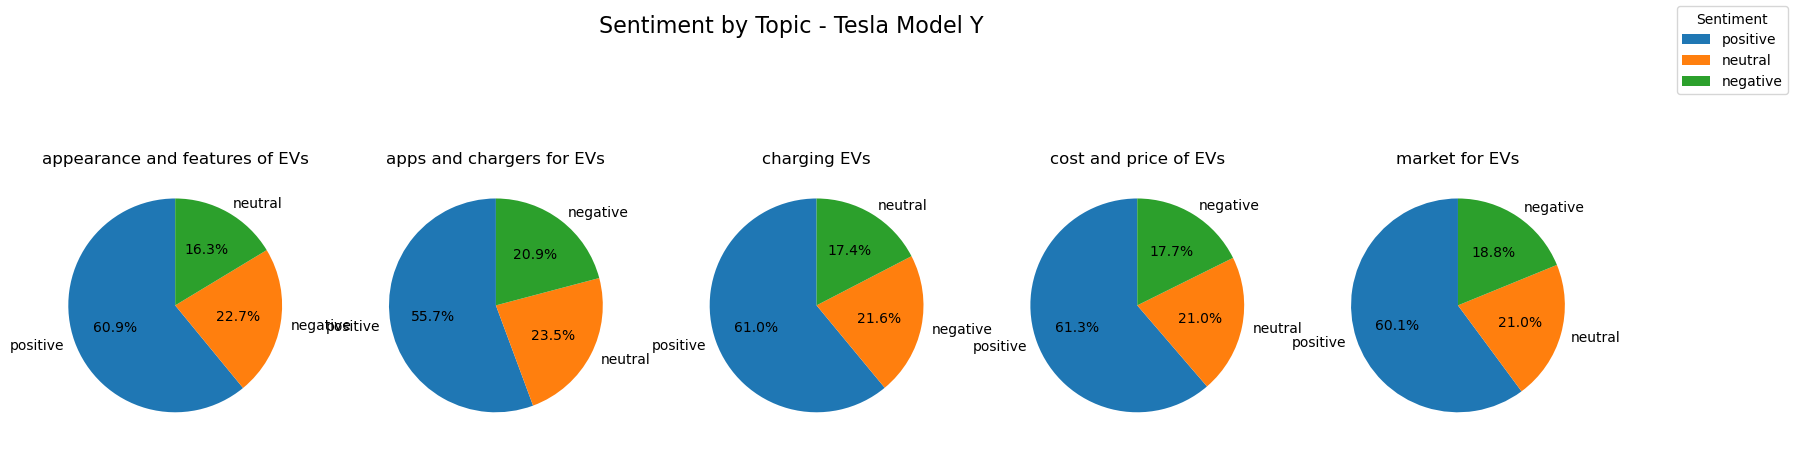

In [159]:
# Plot the frequency of each sentiment for each topic
import numpy as np
general_df=df[df['Model'] == 'Tesla Model Y']
# Count the number of unique topics
num_topics = len(np.unique(general_df['New_Topic']))

# Create a new figure with multiple subplots
fig, axs = plt.subplots(1, num_topics, figsize=(20, 5), subplot_kw=dict(aspect="equal"))

# Loop over each topic and create a pie chart on its corresponding subplot
for i, topic in enumerate(np.unique(general_df['New_Topic'])):
    topic_df = general_df[general_df['New_Topic'] == topic]
    sentiment_counts = topic_df['Sentiment'].value_counts()
    axs[i].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{topic}')

# Set the overall title for the figure
fig.suptitle('Sentiment by Topic - Tesla Model Y', fontsize=16)
fig.set_size_inches(20, 6)

# Add the legend to the figure
fig.legend(sentiment_counts.index, title='Sentiment', loc='upper right')

plt.show()


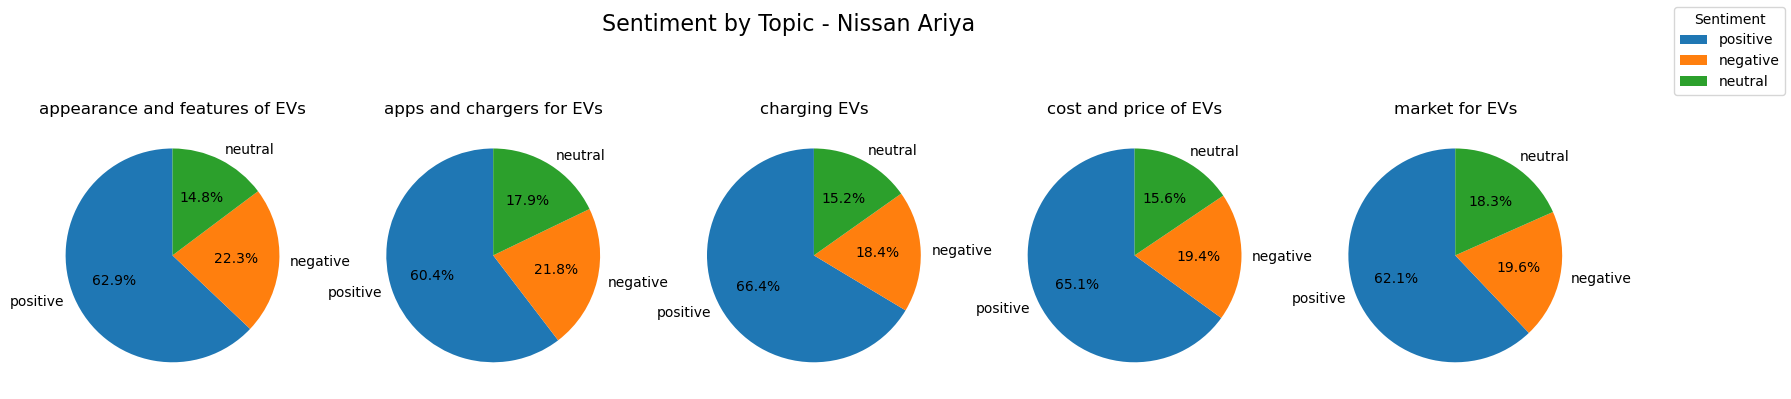

In [130]:
# Plot the frequency of each sentiment for each topic
import numpy as np
general_df=df[df['Model'] == 'Nissan Ariya']
# Count the number of unique topics
num_topics = len(np.unique(general_df['New_Topic']))

# Create a new figure with multiple subplots
fig, axs = plt.subplots(1, num_topics, figsize=(20, 5), subplot_kw=dict(aspect="equal"))

# Loop over each topic and create a pie chart on its corresponding subplot
for i, topic in enumerate(np.unique(general_df['New_Topic'])):
    topic_df = general_df[general_df['New_Topic'] == topic]
    sentiment_counts = topic_df['Sentiment'].value_counts()
    axs[i].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{topic}')

# Set the overall title for the figure
fig.suptitle('Sentiment by Topic - Nissan Ariya', fontsize=16)

# Add the legend to the figure
fig.legend(sentiment_counts.index, title='Sentiment', loc='upper right')

plt.show()


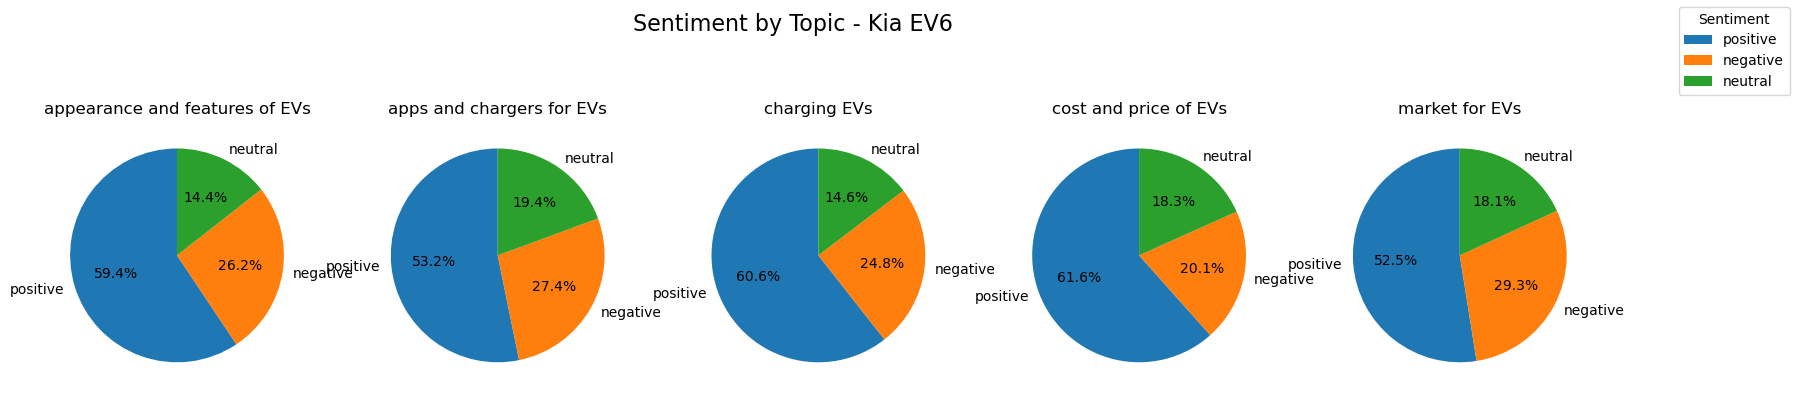

In [132]:
# Plot the frequency of each sentiment for each topic
import numpy as np
general_df=df[df['Model'] == 'Kia EV6']
# Count the number of unique topics
num_topics = len(np.unique(general_df['New_Topic']))

# Create a new figure with multiple subplots
fig, axs = plt.subplots(1, num_topics, figsize=(20, 5), subplot_kw=dict(aspect="equal"))

# Loop over each topic and create a pie chart on its corresponding subplot
for i, topic in enumerate(np.unique(general_df['New_Topic'])):
    topic_df = general_df[general_df['New_Topic'] == topic]
    sentiment_counts = topic_df['Sentiment'].value_counts()
    axs[i].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{topic}')

# Set the overall title for the figure
fig.suptitle('Sentiment by Topic - Kia EV6', fontsize=16)

# Add the legend to the figure
fig.legend(sentiment_counts.index, title='Sentiment', loc='upper right')

plt.show()

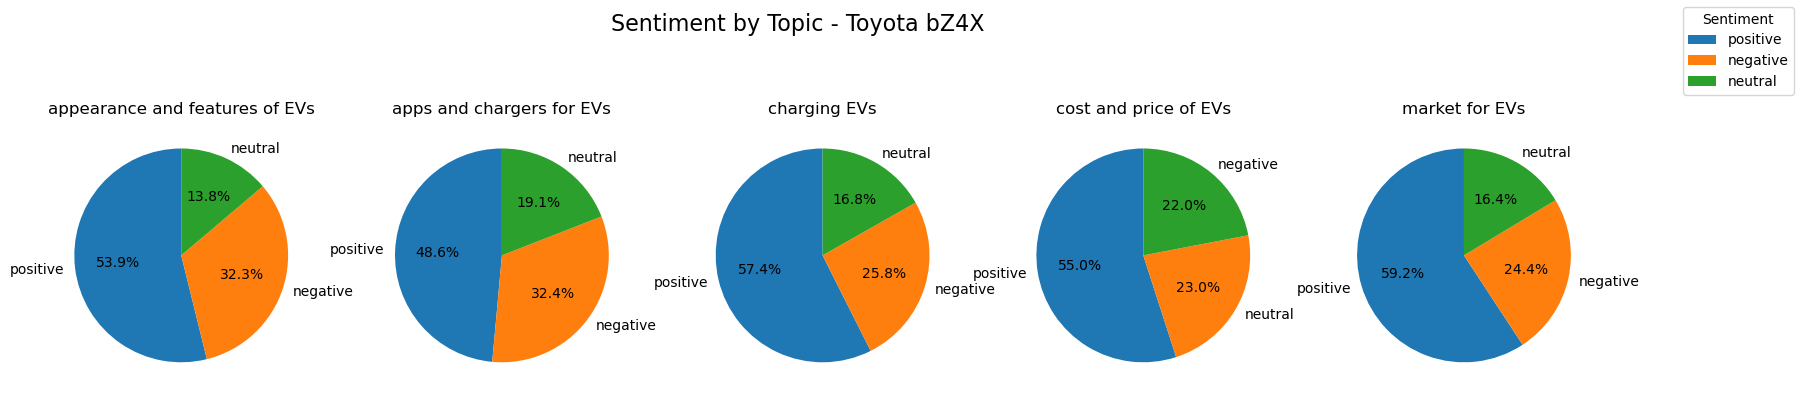

In [135]:
# Plot the frequency of each sentiment for each topic
import numpy as np
general_df=df[df['Model'] == 'Toyota bZ4X']
# Count the number of unique topics
num_topics = len(np.unique(general_df['New_Topic']))

# Create a new figure with multiple subplots
fig, axs = plt.subplots(1, num_topics, figsize=(20, 5), subplot_kw=dict(aspect="equal"))

# Loop over each topic and create a pie chart on its corresponding subplot
for i, topic in enumerate(np.unique(general_df['New_Topic'])):
    topic_df = general_df[general_df['New_Topic'] == topic]
    sentiment_counts = topic_df['Sentiment'].value_counts()
    axs[i].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{topic}')

# Set the overall title for the figure
fig.suptitle('Sentiment by Topic - Toyota bZ4X', fontsize=16)

# Add the legend to the figure
fig.legend(sentiment_counts.index, title='Sentiment', loc='upper right')

plt.show()

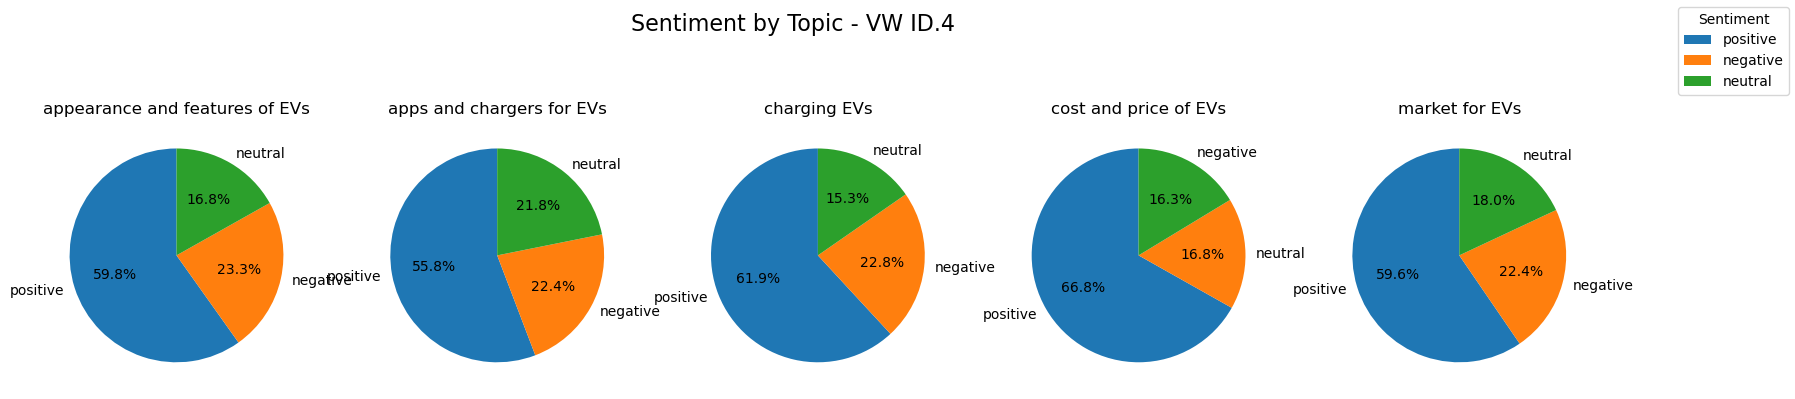

In [136]:
# Plot the frequency of each sentiment for each topic
import numpy as np
general_df=df[df['Model'] == 'VW ID.4']
# Count the number of unique topics
num_topics = len(np.unique(general_df['New_Topic']))

# Create a new figure with multiple subplots
fig, axs = plt.subplots(1, num_topics, figsize=(20, 5), subplot_kw=dict(aspect="equal"))

# Loop over each topic and create a pie chart on its corresponding subplot
for i, topic in enumerate(np.unique(general_df['New_Topic'])):
    topic_df = general_df[general_df['New_Topic'] == topic]
    sentiment_counts = topic_df['Sentiment'].value_counts()
    axs[i].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{topic}')

# Set the overall title for the figure
fig.suptitle('Sentiment by Topic - VW ID.4', fontsize=16)

# Add the legend to the figure
fig.legend(sentiment_counts.index, title='Sentiment', loc='upper right')

plt.show()

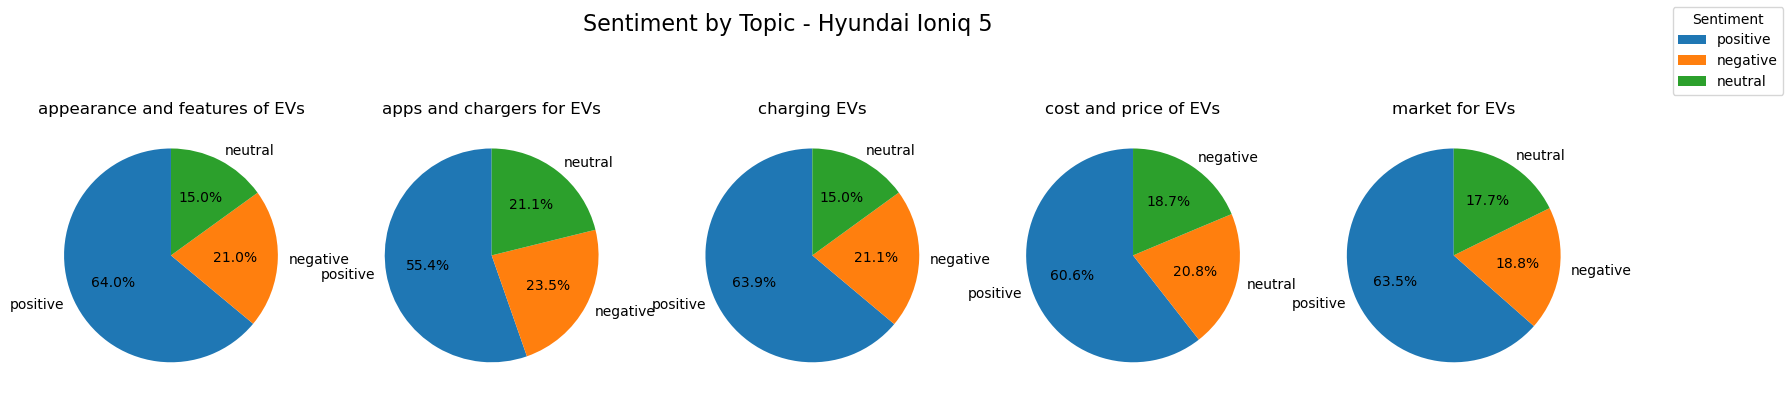

In [137]:
# Plot the frequency of each sentiment for each topic
import numpy as np
general_df=df[df['Model'] == 'Hyundai Ioniq 5']
# Count the number of unique topics
num_topics = len(np.unique(general_df['New_Topic']))

# Create a new figure with multiple subplots
fig, axs = plt.subplots(1, num_topics, figsize=(20, 5), subplot_kw=dict(aspect="equal"))

# Loop over each topic and create a pie chart on its corresponding subplot
for i, topic in enumerate(np.unique(general_df['New_Topic'])):
    topic_df = general_df[general_df['New_Topic'] == topic]
    sentiment_counts = topic_df['Sentiment'].value_counts()
    axs[i].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{topic}')

# Set the overall title for the figure
fig.suptitle('Sentiment by Topic - Hyundai Ioniq 5', fontsize=16)

# Add the legend to the figure
fig.legend(sentiment_counts.index, title='Sentiment', loc='upper right')

plt.show()

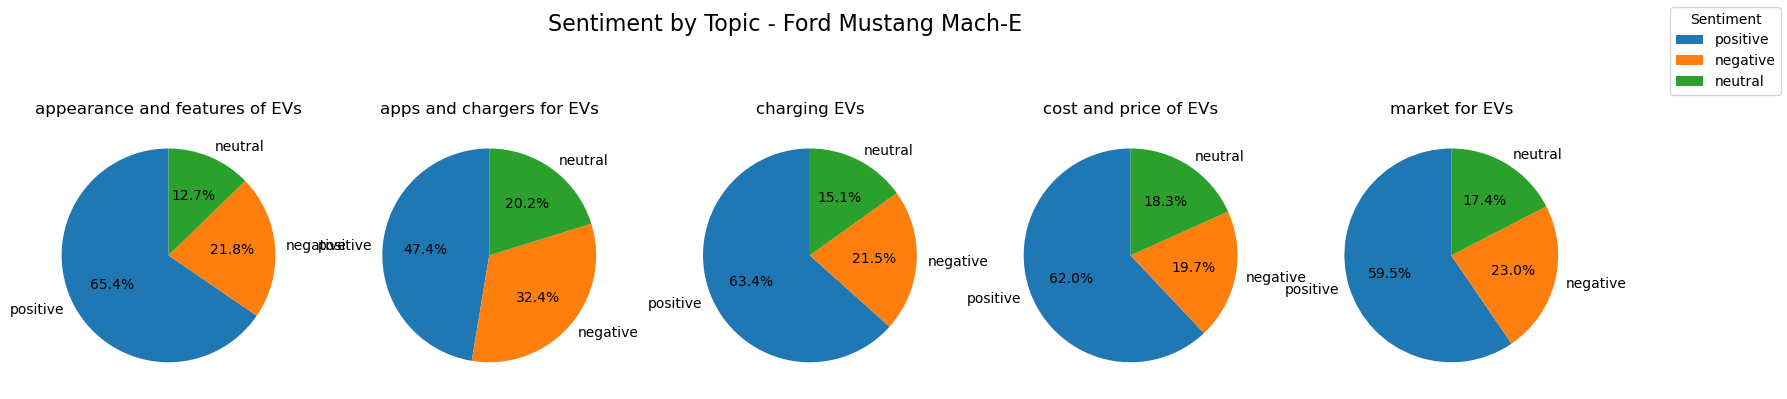

In [138]:
# Plot the frequency of each sentiment for each topic
import numpy as np
general_df=df[df['Model'] == 'Ford Mustang Mach-E']
# Count the number of unique topics
num_topics = len(np.unique(general_df['New_Topic']))

# Create a new figure with multiple subplots
fig, axs = plt.subplots(1, num_topics, figsize=(20, 5), subplot_kw=dict(aspect="equal"))

# Loop over each topic and create a pie chart on its corresponding subplot
for i, topic in enumerate(np.unique(general_df['New_Topic'])):
    topic_df = general_df[general_df['New_Topic'] == topic]
    sentiment_counts = topic_df['Sentiment'].value_counts()
    axs[i].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{topic}')

# Set the overall title for the figure
fig.suptitle('Sentiment by Topic - Ford Mustang Mach-E', fontsize=16)

# Add the legend to the figure
fig.legend(sentiment_counts.index, title='Sentiment', loc='upper right')

plt.show()

## Explore deep more about charging

In [90]:
# Extract comments about charging
charge = df.loc[df['New_Topic'] == "charging EVs"]

In [92]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Convert the comments into a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(charge['cleaned_comment'])

# Fit an LDA model to the data
lda = LatentDirichletAllocation(n_components=5, random_state=42)
X_topics = lda.fit_transform(X)

# Create a dataframe with the topic labels for each comment
topic_labels = [f"Topic {topic_idx}" for topic_idx in X_topics.argmax(axis=1)]
topics_df = pd.DataFrame({'Topic': topic_labels})
# Print the top 10 words for each topic
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    top_words_idx = topic.argsort()[::-1][:10] # get the indices of the top 10 words for the topic
    top_words = [feature_names[i] for i in top_words_idx]
    print(top_words)
    print()

Topic 0:
['car', 'seat', 'drive', 'tesla', 'id4', 'better', 'like', 'ev', 'model', 'trip']

Topic 1:
['car', 'range', 'drive', 'mile', 'driving', 'like', 'vehicle', 'charge', 'really', 'ev']

Topic 2:
['range', 'mile', 'driving', 'cold', 'speed', 'trip', 'winter', 'weather', 'highway', 'battery']

Topic 3:
['battery', 'car', 'charge', 'mile', 'charging', 'year', 'time', 'day', '100', 'like']

Topic 4:
['car', 'like', 'new', 'gt', 'im', 'vehicle', 'ev6', 'time', 'drive', 'wheel']



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [96]:
charge = charge.reset_index(drop=True)
topics_df = topics_df.reset_index(drop=True)
# Concatenate the original dataframe and the topics dataframe along the column axis
charge_topics = pd.concat([charge, topics_df], axis=1)
#charge_topics.to_csv("car_website_data/charge_topics.csv")
charge_topics=charge_topics.dropna()
# Combine all comments into a single string
comments = ' '.join(charge_topics['cleaned_comment'])

import nltk
from nltk.corpus import stopwords
from collections import defaultdict

# download the stop words if you haven't already done so
nltk.download('stopwords')

# Define a set of stopwords to remove from the word cloud
stopwords = set(['car', 'vehicle', 'see', 'think', 'people', 'use', 'tesla', 'one','even','going','ev',
                'also','would','used','model','that','leaf','get','got','thing','still',
                'thats','said','say','maybe','could','dont','actually','getting','im','though',
                'lot','u','many','didnt','much','toyota','know','back','want','since','without','like','time',
                'new','make','need','year','charging','charge','5','look','really','z','100','3'])

# tokenize the comments
tokens = nltk.word_tokenize(comments)

# remove the stop words
filtered_tokens = [word for word in tokens if word.lower() not in stopwords]

# calculate the frequency of the remaining words
word_freq = defaultdict(int)
for token in filtered_tokens:
    word_freq[token] += 1

# print the top 10 most frequent words
for word, freq in sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:25]:
    print(f"{word}: {freq}")



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


’: 4293
mile: 2324
range: 2187
battery: 1797
drive: 1773
driving: 1388
trip: 1098
day: 951
road: 899
better: 790
go: 767
long: 765
way: 720
speed: 683
good: 665
around: 662
cold: 623
seat: 621
well: 583
le: 572
id4: 567
take: 565
ive: 535
ev6: 528
winter: 525


In [94]:
# Extract comments about appearance
appearance = df.loc[df['New_Topic'] == "appearance and features of EVs"]

# Convert the comments into a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(appearance['cleaned_comment'])

# Fit an LDA model to the data
lda = LatentDirichletAllocation(n_components=5, random_state=42)
X_topics = lda.fit_transform(X)

# Create a dataframe with the topic labels for each comment
topic_labels = [f"Topic {topic_idx}" for topic_idx in X_topics.argmax(axis=1)]
topics_df = pd.DataFrame({'Topic': topic_labels})
# Print the top 10 words for each topic
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    top_words_idx = topic.argsort()[::-1][:10] # get the indices of the top 10 words for the topic
    top_words = [feature_names[i] for i in top_words_idx]
    print(top_words)
    print()

Topic 0:
['car', 'gt', 'mustang', 'make', 'engine', 'like', 'ford', 'got', 'sure', 'need']

Topic 1:
['car', 'like', 'rear', 'wheel', 'driving', 'time', 'door', 'issue', 'mode', 'seat']

Topic 2:
['car', 'look', 'like', 'tesla', 'really', 'love', 'think', 'better', 'thing', 'good']

Topic 3:
['nissan', 'battery', 'car', 'new', 'ariya', 'mile', 'like', 'tire', 'year', 'ev']

Topic 4:
['car', 'tire', 'toyota', 'ev', 'year', 'wheel', 'tesla', 'electric', 'like', 'model']



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [97]:
appearance_topics= appearance_topics.reset_index(drop=True)
topics_df = topics_df.reset_index(drop=True)
# Concatenate the original dataframe and the topics dataframe along the column axis
appearance_topics = pd.concat([appearance, topics_df], axis=1)
appearance_topics=appearance_topics.dropna()
# Combine all comments into a single string
comments = ' '.join(appearance_topics['cleaned_comment'])

import nltk
from nltk.corpus import stopwords
from collections import defaultdict

# download the stop words if you haven't already done so
nltk.download('stopwords')

# Define a set of stopwords to remove from the word cloud
stopwords = set(['car', 'vehicle', 'see', 'think', 'people', 'use', 'tesla', 'one','even','going','ev',
                'also','would','used','model','that','leaf','get','got','thing','still',
                'thats','said','say','maybe','could','dont','actually','getting','im','though',
                'lot','u','many','didnt','much','toyota','know','back','want','since','without','like','time',
                'new','make','need','year','charging','charge','drive','driving'])

# tokenize the comments
tokens = nltk.word_tokenize(comments)

# remove the stop words
filtered_tokens = [word for word in tokens if word.lower() not in stopwords]

# calculate the frequency of the remaining words
word_freq = defaultdict(int)
for token in filtered_tokens:
    word_freq[token] += 1

# print the top 10 most frequent words
for word, freq in sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:25]:
    print(f"{word}: {freq}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


’: 7044
look: 3971
really: 1782
nissan: 1584
good: 1544
better: 1532
wheel: 1512
electric: 1367
love: 1354
mustang: 1315
way: 1160
design: 1147
interior: 1128
go: 1089
z: 1055
great: 1037
looking: 1030
feel: 944
well: 940
front: 927
first: 874
5: 861
nice: 859
buy: 849
kia: 835


In [99]:

# Extract comments about market
cost = df.loc[df['New_Topic'] == "market for EVs"]

# Convert the comments into a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(cost['cleaned_comment'])

# Fit an LDA model to the data
lda = LatentDirichletAllocation(n_components=5, random_state=42)
X_topics = lda.fit_transform(X)

# Create a dataframe with the topic labels for each comment
topic_labels = [f"Topic {topic_idx}" for topic_idx in X_topics.argmax(axis=1)]
topics_df = pd.DataFrame({'Topic': topic_labels})
# Print the top 10 words for each topic
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    top_words_idx = topic.argsort()[::-1][:10] # get the indices of the top 10 words for the topic
    top_words = [feature_names[i] for i in top_words_idx]
    print(top_words)
    print()
    
cost= cost.reset_index(drop=True)
topics_df = topics_df.reset_index(drop=True)
# Concatenate the original dataframe and the topics dataframe along the column axis
cost_topics = pd.concat([cost, topics_df], axis=1)

Topic 0:
['car', 'update', 'dealer', 'issue', 'like', 'software', 'year', 'dealership', 'kia', 'ev']

Topic 1:
['dealer', 'order', 'nissan', 'new', 'ariya', 'got', 'car', 'like', 'vehicle', 'time']

Topic 2:
['thanks', 'post', 'time', 'like', 'know', 'got', 'people', 'im', 'thank', 'car']

Topic 3:
['car', 'said', 'tesla', 'service', 'know', 'dealer', 'dealership', 'nissan', 'time', 'link']

Topic 4:
['car', 'im', 'delivery', 'good', 'review', 'order', 'great', 'video', 'got', 'week']



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [100]:
cost_topics=cost_topics.dropna()
# Combine all comments into a single string
comments = ' '.join(cost_topics['cleaned_comment'])

import nltk
from nltk.corpus import stopwords
from collections import defaultdict

# download the stop words if you haven't already done so
nltk.download('stopwords')

# Define a set of stopwords to remove from the word cloud
stopwords = set(['car', 'vehicle', 'see', 'think', 'people', 'use', 'tesla', 'one','even','going','ev',
                'also','would','used','model','that','leaf','get','got','thing','still',
                'thats','said','say','maybe','could','dont','actually','getting','im','though',
                'lot','u','many','didnt','much','toyota','know','back','want','since','without','like','time',
                'new','make','need','year','charging','charge','drive','driving','battery','company','charger','better'])

# tokenize the comments
tokens = nltk.word_tokenize(comments)

# remove the stop words
filtered_tokens = [word for word in tokens if word.lower() not in stopwords]

# calculate the frequency of the remaining words
word_freq = defaultdict(int)
for token in filtered_tokens:
    word_freq[token] += 1

# print the top 10 most frequent words
for word, freq in sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:25]:
    print(f"{word}: {freq}")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


’: 6582
dealer: 2321
order: 1371
issue: 1268
good: 1178
dealership: 1154
video: 1132
update: 1104
week: 1103
delivery: 1075
nissan: 1060
month: 1055
review: 981
day: 951
thanks: 949
go: 930
first: 923
well: 899
z: 892
great: 879
really: 856
sure: 841
take: 822
service: 803
work: 793


In [102]:

# Extract comments about charger or app
cost = df.loc[df['New_Topic'] == "apps and chargers for EVs"]

# Convert the comments into a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(cost['cleaned_comment'])

# Fit an LDA model to the data
lda = LatentDirichletAllocation(n_components=5, random_state=42)
X_topics = lda.fit_transform(X)

# Create a dataframe with the topic labels for each comment
topic_labels = [f"Topic {topic_idx}" for topic_idx in X_topics.argmax(axis=1)]
topics_df = pd.DataFrame({'Topic': topic_labels})
# Print the top 10 words for each topic
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    top_words_idx = topic.argsort()[::-1][:10] # get the indices of the top 10 words for the topic
    top_words = [feature_names[i] for i in top_words_idx]
    print(top_words)
    print()
    
cost= cost.reset_index(drop=True)
topics_df = topics_df.reset_index(drop=True)
# Concatenate the original dataframe and the topics dataframe along the column axis
charger_topics = pd.concat([cost, topics_df], axis=1)

Topic 0:
['car', 'control', 'setting', 'time', 'climate', 'set', 'turn', 'screen', 'button', 'change']

Topic 1:
['tesla', 'charging', 'charger', 'plug', 'car', 'work', 'use', 'wall', 'like', 'outlet']

Topic 2:
['phone', 'use', 'car', 'app', 'carplay', 'android', 'wireless', 'usb', 'work', 'apple']

Topic 3:
['car', 'button', 'door', 'key', 'app', 'lock', 'time', 'open', 'unlock', 'like']

Topic 4:
['charger', 'charge', 'charging', 'car', 'time', 'home', 'ea', 'station', 'level', 'battery']



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [103]:
charger_topics=charger_topics.dropna()
# Combine all comments into a single string
comments = ' '.join(charger_topics['cleaned_comment'])

import nltk
from nltk.corpus import stopwords
from collections import defaultdict

# download the stop words if you haven't already done so
nltk.download('stopwords')

# Define a set of stopwords to remove from the word cloud
stopwords = set(['car', 'vehicle', 'see', 'think', 'people', 'use', 'tesla', 'one','even','going','ev',
                'also','would','used','model','that','leaf','get','got','thing','still',
                'thats','said','say','maybe','could','dont','actually','getting','im','though',
                'lot','u','many','didnt','much','toyota','know','back','want','since','without','like','time',
                'new','make','need','year','charging','charge','drive','driving','battery','company','charger','better'])

# tokenize the comments
tokens = nltk.word_tokenize(comments)

# remove the stop words
filtered_tokens = [word for word in tokens if word.lower() not in stopwords]

# calculate the frequency of the remaining words
word_freq = defaultdict(int)
for token in filtered_tokens:
    word_freq[token] += 1

# print the top 10 most frequent words
for word, freq in sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:25]:
    print(f"{word}: {freq}")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


’: 4619
work: 1213
app: 1126
button: 1031
home: 810
plug: 810
go: 732
phone: 730
control: 718
issue: 712
station: 678
turn: 665
set: 664
2: 663
using: 642
setting: 612
level: 605
ea: 605
power: 573
climate: 549
way: 539
amp: 539
really: 522
door: 520
right: 510


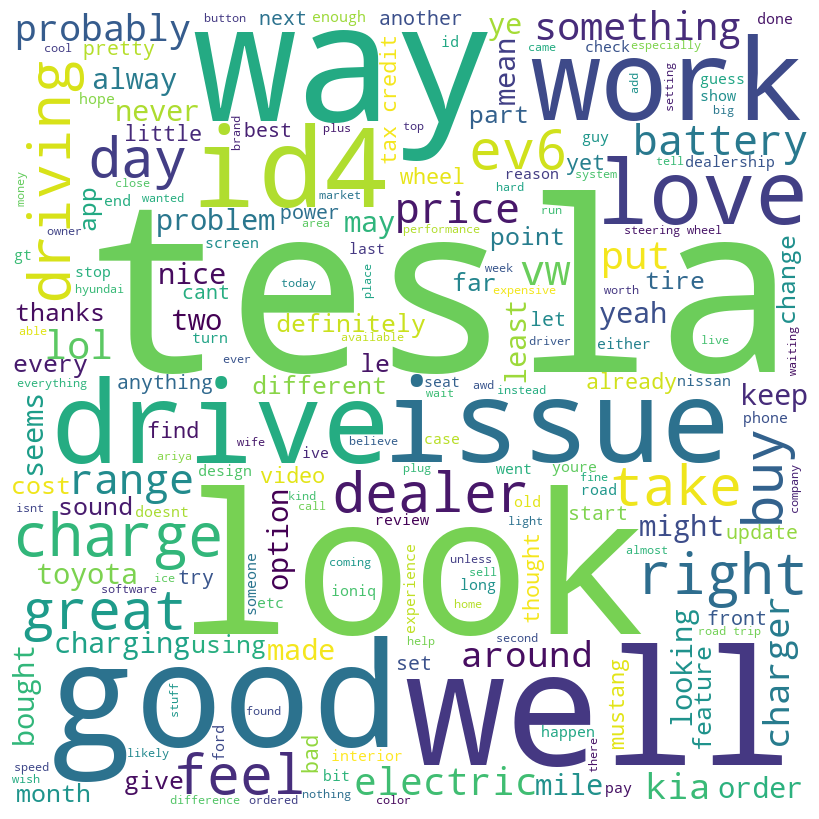

In [13]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all comments into a single string
comments = ' '.join(df_10['cleaned_comment'])

# Define a set of stopwords to remove from the word cloud
stopwords = set(['car', 'vehicle', 'see', 'think', 'people', 'use', 'one','even','going','ev',
                'also','would','used','model','that','leaf','get','got','thing','still',
                'thats','said','say','maybe','could','dont','actually','getting','im','though',
                'lot','u','many','didnt','much','know','back','want','since','without','like','time',
                'new','make','need','year','first','really','go','sure','seem','come','mine','better',
                'thank'])

# Add the default set of stopwords from the WordCloud library
stopwords.update(stopwords)

# Create a WordCloud object with the specified stopwords
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,
                stopwords = stopwords).generate(comments)

# Display the generated image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Save the image to a file
wordcloud.to_file("wordcloud_model.png")

# Show the plot
plt.show()